## Entrepreneurs and Teaching Artists Findings (Notebook 1)

This notebook will answer questions for the roles Creative Entrepreneurs and Arts Educators.

First off, let us load the .xlsx file into a dataframe that contains all data which was preprocessed. We can do this using the pandas library.

In [1]:
import pandas as pd
#Load '2023-organized-survey.xlsx' file into a dataframe
df_organized_survey = pd.read_excel('2023-organized-survey.xlsx')

#Display first 5 rows of the dataframe to understand its structure
df_organized_survey.head()

,Time of Response,Postal Code,Describe Your Location,Identified Gender,Age,Select Your Race/Ethnicity,Identify Membership in Given Populations,Describe Your Primary Role in Creative Sector,Primary Creative Activity,Years of Professional Creative Practice,...,Which topics would you most like to see addressed in a workshop or seminar? (Check all that apply),Did you know The Non-Profit offers free legal and professional services to eligible artists and arts organizations in The Area through our VLPA program?,"If so, have you ever used the VLPA's legal or business services?",Are you considering using the VLPA's free legal or business services in the future?,Do you plan to remain in The Area for more than the next 2-3 years?,"If you're undecided or planning to leave, why? (Select all that apply)",Any other comments on your reasons for staying in or departing from The Area's creative ecosystem?,What three words come to mind when you think of the Arts & Business Council of Greater Nashville?,"Please suggest any additional volunteer, educational, or other services that The Non-Profit could provide:",Feel free to share any additional insights about The Non-Profit or The Area's Creative Economy not covered in this survey:
0,2023-05-01 16:41:12.806,36235,Suburban,Non-binary,Prefer not to say,Native Hawaiian or Other Pacific Islander,Individuals with disabilities,"Creative Entrepreneurs (Artists, performers, m...",Printmaking,6-10 years,...,Low-Cost Marketing Methods,No,Yes,No,"Maybe, its a hard decision.",Perceived lack of creative career opportunities,"Ive been here too long, need fresh perspectives.","Thoughtful, Reflective, Meaningful",Workshops on sustainable art practices.,The Area is becoming a global art destination.
1,2023-05-02 03:44:08.314,38838,Rural,Non-binary,Young Adults (Age 19-24),Black or African American,Individuals with Limited English Proficiency,"Creative Entrepreneurs (Artists, performers, m...",Calligraphy,11-20 years,...,Genre-specific Software Training (such as Fina...,Yes,Yes,No,"No, not enough opportunities for growth.",Perceived lack of educational opportunities to...,Its a great place for networking.,"Awe-inspiring, Memorable, Lasting",Portfolio review sessions.,There’s a need for more diverse leadership in ...
2,2023-05-04 06:24:47.115,36420,Suburban,Prefer not to say,Older Adults (Age 65+),Prefer not to say,New Americans (immigrants and refugees)*,"Creative Entrepreneurs (Artists, performers, m...",Installation Art,0-5 years,...,Time Management,Yes,No,Yes,"Yes, my studio space is ideal here.",Open to professional work opportunities outsid...,I want to explore and get global exposure.,"Engaging, Interactive, Insightful",A directory of local artists and their expertise.,I wish the Non-Profit had a stronger online pr...
3,2023-05-04 09:18:14.423,32047,Urban,Male,Adults (Age 25-64),American Indian/Alaska Native,Military Veterans/Active Duty Personnel,"Creative Entrepreneurs (Artists, performers, m...",Mixed Media Art,0-5 years,...,Accounting Best Practices,Yes,No,Maybe,"Maybe, depends on family decisions.",Perceived lack of artistic support from the city,It lacks diversity in art forms.,"Revolutionary, Game-changer, Significant",Programs in schools to promote arts from a you...,The Area is becoming a global art destination.
4,2023-05-05 04:59:48.817,31184,Urban,Male,Children/Youth (Age 0-18),American Indian/Alaska Native,People of Color (American Indian/Alaska Native,"Creative Entrepreneurs (Artists, performers, m...",Drawing,20+ years,...,Genre-specific Software Training (such as Fina...,No,No,Maybe,"Maybe, I might get a residency elsewhere.",Personal/professional openminded-ness to reloc...,The ecosystem is too centered around a few art...,"Impactful, Authentic, Genuine",More workshops on digital art techniques.,The Area has so much untapped talent that need...


### 1. Creative Entrepreneurs: What is the distribution of the years in creative practice vs the age of the demographic?

To answer this question, we first need to examine the dataframe and see which columns pertain to answering the question. After further investigation, columns "Age," "Describe Your Primary Role in Creative Sector," and "Years of Professional Creative Practice" are needed for this question.


Since the question is specifying only those that have the role "Creative Entrepreneurs," we need to grab the unique values of that column to see what that role is called in the data.

In [2]:
# Check the unique values in 'Describe Your Primary Role in Creative Sector' to verify the presence of "Creative Entrepreneurs"
unique_roles = df_organized_survey['Describe Your Primary Role in Creative Sector'].unique()

unique_roles

array(['Creative Entrepreneurs (Artists, performers, makers, creatives of all disciplines, self-employed)',
       'Creative Worker (In-house graphic designers, copywriters, art directors employed at a business working in the creative industries)',
       'Arts Administrator (Theater managers, development staff, executive directors, program coordinators at an arts-based business usually a non-profit, e.g., at a museum, symphony, theater, etc.)',
       'Arts Educator or Teaching Artist (Art teachers, music teachers, teaching artists, dance teachers, visiting artists)',
       'Arts Funder (Foundations; national, state, and local arts agencies)',
       'Business Professional (Attorneys, bankers, CPAs, other professionals working in small to large businesses outside of the creative industries)',
       'Civic and/or Social Service Worker (Social worker, government employee, NGO working outside the arts)'],
      dtype=object)

Creative Entrepreneurs is called as "Creative Entrepreneurs (Artists, performers, makers, creatives of all disciplines, self-employed)" in the data, so now we can start to find the distribution of years in creative practice vs the age of the demographic.

We can use a countplot to depict this distribution. First, we filter the primary role column to include only the Creative Entrepreneurs, and then put them in a separate dataframe with their corresponding answers to the survey. Next, we create a countplot, with the number of respondents on the x-axis and the years of professional creative practice on the y-axis. To highlight the age demographic, we can set the hue of the countplot as the age column, so each bar can show the distribution for a particular age group.

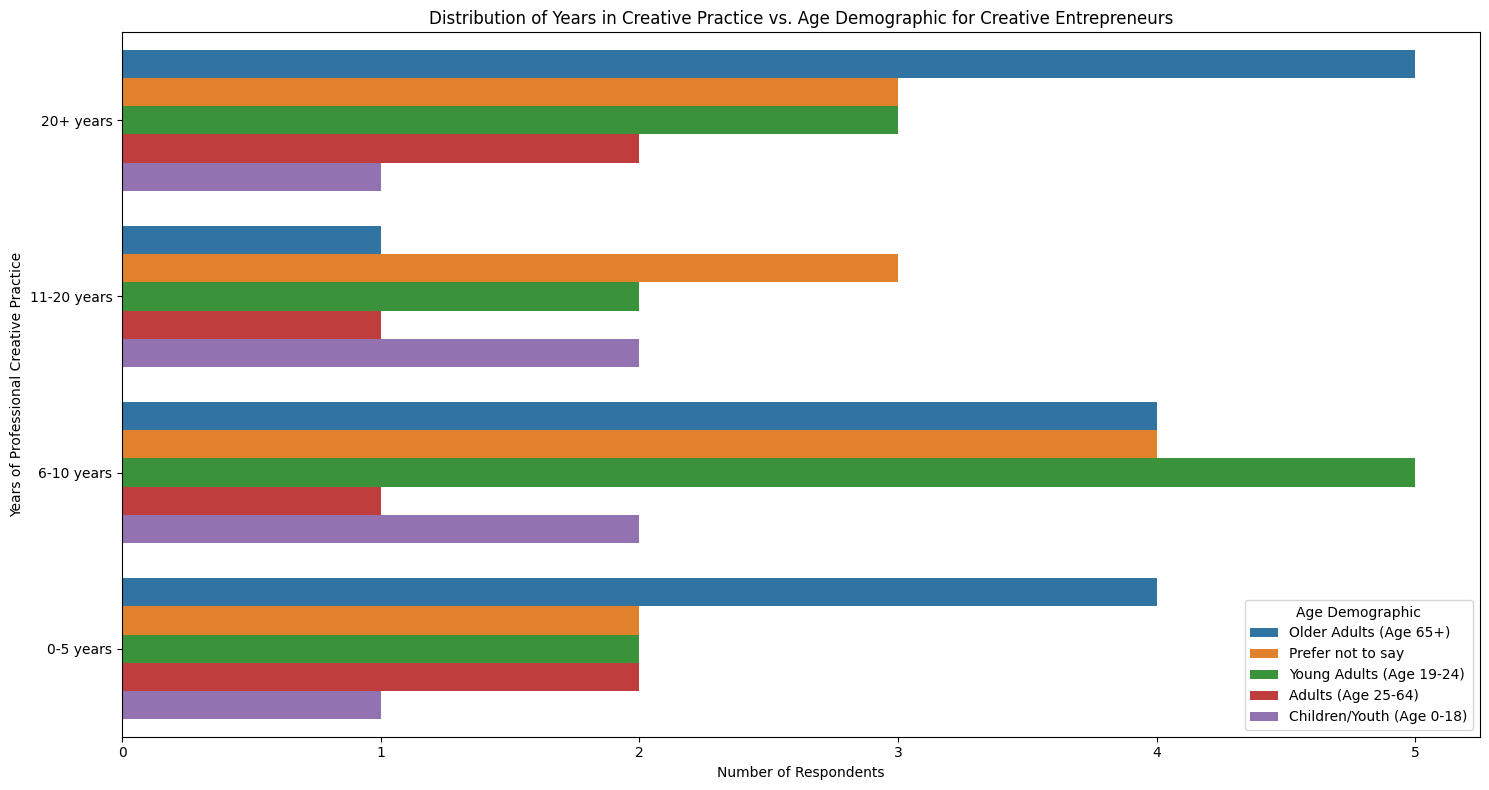

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#Filter data for Creative Entrepreneurs
creative_entrepreneurs = 'Creative Entrepreneurs (Artists, performers, makers, creatives of all disciplines, self-employed)'
df_creative_entrepreneurs = df_organized_survey[df_organized_survey['Describe Your Primary Role in Creative Sector'] == creative_entrepreneurs]

#Specify correct order for the y-axis
order_y_axis = ['20+ years', '11-20 years', '6-10 years', '0-5 years']

# Plot the distribution
plt.figure(figsize=(15, 8))
sns.countplot(data=df_creative_entrepreneurs, y='Years of Professional Creative Practice', hue='Age', 
              order=order_y_axis, 
              hue_order=df_creative_entrepreneurs['Age'].value_counts().index)
plt.title('Distribution of Years in Creative Practice vs. Age Demographic for Creative Entrepreneurs')
plt.xlabel('Number of Respondents')
plt.ylabel('Years of Professional Creative Practice')
plt.legend(title='Age Demographic')
plt.tight_layout()
plt.show()

After examining the countplot, we can see that as the number of years of profressional creative practice increases, so does the number of respondents by age demographic. For example, with 0-5 years of creative practice, there are 2 young adults, but that increases to 5 when looking at 6-10 years of creative practice. For older adults, they generally have more number of respondents from 0-5 years, 6-10 years, and 20+ years. Children/youth have a low count of respondents throughout all categories of creative practice. We can conclude that one reason the count is so high for older adults is because they either started as a creative entrepreneur very early on, explaining being the highest for the 20+ years creative practice, or they made a career change later in life, wanting to do something else. Hence, they are the highest count in the 0-5 years of creative practice as well.

### 2. Creative Entrepreneurs: What is the rate of business closure out of the participants?


This question requires us to look at Creative Entrepreneurs again. We can use the dataframe created in the last question that filters by this role. The column "Did You Close Your Arts Business Recently" will help us answer it. Looking at this column, the values are either 'yes' or 'no,' so we can filter out the 'yes' values, sum them up, and divide by the total number of values to obtain the rate.

In [4]:
#Filter relevant data
closure_data = df_creative_entrepreneurs['Did You Close Your Arts Business Recently']

#Calculate the rate of business closure
closure_rate = (closure_data == 'Yes').sum() / len(closure_data)

#Multiply by 100 to get percentage
closure_rate_percentage = closure_rate * 100

#Print statement answering the question
print('The rate of business closure out of the participants is {}%.'.format(closure_rate_percentage))

The rate of business closure out of the participants is 46.0%.


We can take this a step further and visualize the results. First, we make a simple countplot showing how many 'yes' and 'no' values there are for this column.

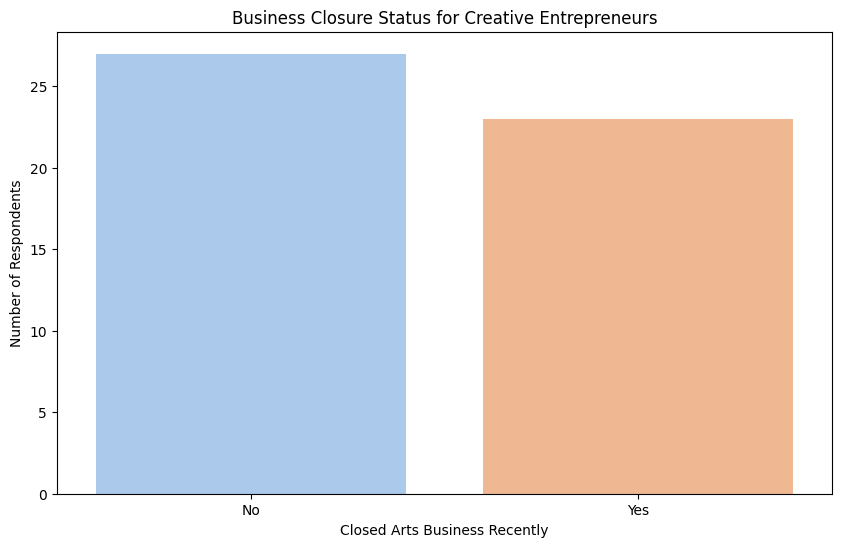

In [5]:
# Visualize the rate of business closure among Creative Entrepreneurs
plt.figure(figsize=(10, 6))
sns.countplot(data=df_creative_entrepreneurs, x='Did You Close Your Arts Business Recently', palette="pastel")
plt.title('Business Closure Status for Creative Entrepreneurs')
plt.xlabel('Closed Arts Business Recently')
plt.ylabel('Number of Respondents')
plt.show()

Since the rate of business closure is 46%, the rate of people staying in business is 54%. The countplot confirms our calculation, as it is shown that the 'yes' bar is less than the 'no' bar.

There is a column in the data called "Reasons for Closing Arts Business," so plotting this can give us a good idea as to why creative entrepreneurs closed their business.

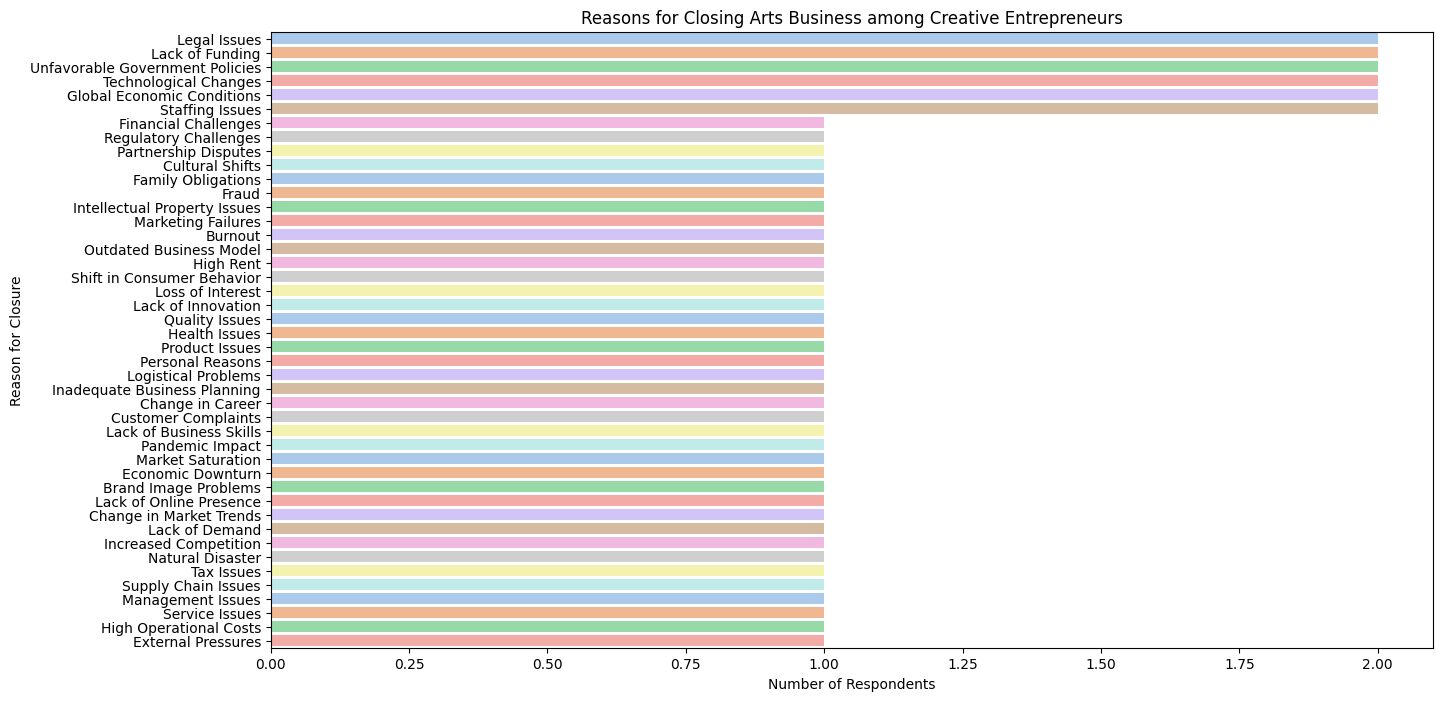

In [6]:
#Visualize reasons for business closure
plt.figure(figsize=(15, 8))
sns.countplot(data=df_creative_entrepreneurs, y='Reasons for Closing Arts Business', palette="pastel", 
              order=df_creative_entrepreneurs['Reasons for Closing Arts Business'].value_counts().index)

plt.title('Reasons for Closing Arts Business among Creative Entrepreneurs')
plt.xlabel('Number of Respondents')
plt.ylabel('Reason for Closure')
plt.show()

Looking at the plot, the most common reason was due to financial challenges. The next most common reasons are supply chain issues, logistical problems, market saturation, and customer complaints. There are several other reasons, but it shows how much goes into keeping the business open, and where some creative entrepreneurs failed.

### 3. Arts Educators: What is the distribution of years as an arts educator relative to the age of the demographic?


For this question, we conduct a very similar process like we did in question 1, except it will be for Arts Educators now. We still use the "Age" column.

Arts Educators is called "Arts Educator or Teaching Artist (Art teachers, music teachers, teaching artists, dance teachers, visiting artists)" in the data.

Next, we create a separate dataframe where all answers of the survey are only from Arts Educators.

In [7]:
#Filter data for Arts Educators
arts_educators_role = 'Arts Educator or Teaching Artist (Art teachers, music teachers, teaching artists, dance teachers, visiting artists)'

#Create separate dataframe
df_arts_educators = df_organized_survey[df_organized_survey['Describe Your Primary Role in Creative Sector'] == arts_educators_role]

We can then check the unique values for columns "Years of Professional Creative Practice" and "Age" in the dataframe with just Art Educators to ensure there is data to work with.

In [8]:
# Check the unique values in 'Years of Professional Creative Practice' and 'Age' columns for Arts Educators to identify any anomalies
years_of_educator_practice_values = df_arts_educators['Years of Professional Creative Practice'].unique()
age_educator_values = df_arts_educators['Age'].unique()

years_of_educator_practice_values, age_educator_values

(array([nan], dtype=object),
 array(['Young Adults (Age 19-24)', 'Adults (Age 25-64)',
        'Children/Youth (Age 0-18)', 'Older Adults (Age 65+)',
        'Prefer not to say'], dtype=object))

This output is that the column "Years of Professional Creative Practice" has no values for Art Educators. Thus, we cannot proceed in plotting a distribution as there is no data.

We can conclude that either all Arts Educators did not fill out this question in the survey, or there was an issue when the data was taken from people's survey and put into an Excel file.

### 4. Arts educator: What types of creative disciplines are taught and at what distribution?

Continuing onto the next question, we need to used the filtered data with just the Arts Educators Roles, and see which columns could help us answer this question.

After manual inspection, the columns that are relevant to this question are: 'Primary Creative Activity', 'Arts Disciplines Experienced in Last Year' and 'Which art disciplines have you experienced in the past year?.1'. Let us see what the values are for these columns.

In [9]:
primary_creative_values = df_arts_educators['Primary Creative Activity'].unique()
arts_disciplines_experienced_values = df_arts_educators['Arts Disciplines Experienced in Last Year'].unique()
which_art_disciplines_values = df_arts_educators['Which art disciplines have you experienced in the past year?.1'].unique()

primary_creative_values, arts_disciplines_experienced_values, which_art_disciplines_values

(array(['Comedy', 'Dance', 'Textile Art', 'Web Design', 'Graphic Design',
        'Video Art', 'Illustration', 'Street Art', 'Animation', 'Writing',
        'Art Teaching', 'Photography', 'Pottery', 'Crafts', 'Magic',
        'Stand-up Comedy', 'Ceramics', 'Jewelry Making', 'Sculpting',
        'Acting', 'Mixed Media Art', 'Singing', 'Painting', 'Mime',
        'Puppetry', 'Film Making', 'Theater', 'Installation Art', 'Poetry',
        'Woodworking', 'Art Curation', 'Drawing', 'Graffiti',
        'Culinary Arts', 'Performance Art', 'Printmaking', 'Game Design',
        'Dance Choreography', 'Metalworking', 'Digital Art',
        'Music Production', 'Calligraphy', 'Fashion Design',
        'Glass Blowing'], dtype=object),
 array([nan], dtype=object),
 array([nan], dtype=object))

Only the "Primary Creative Activity Column" has values for Arts Educators, so we will use that to plot the distribution.

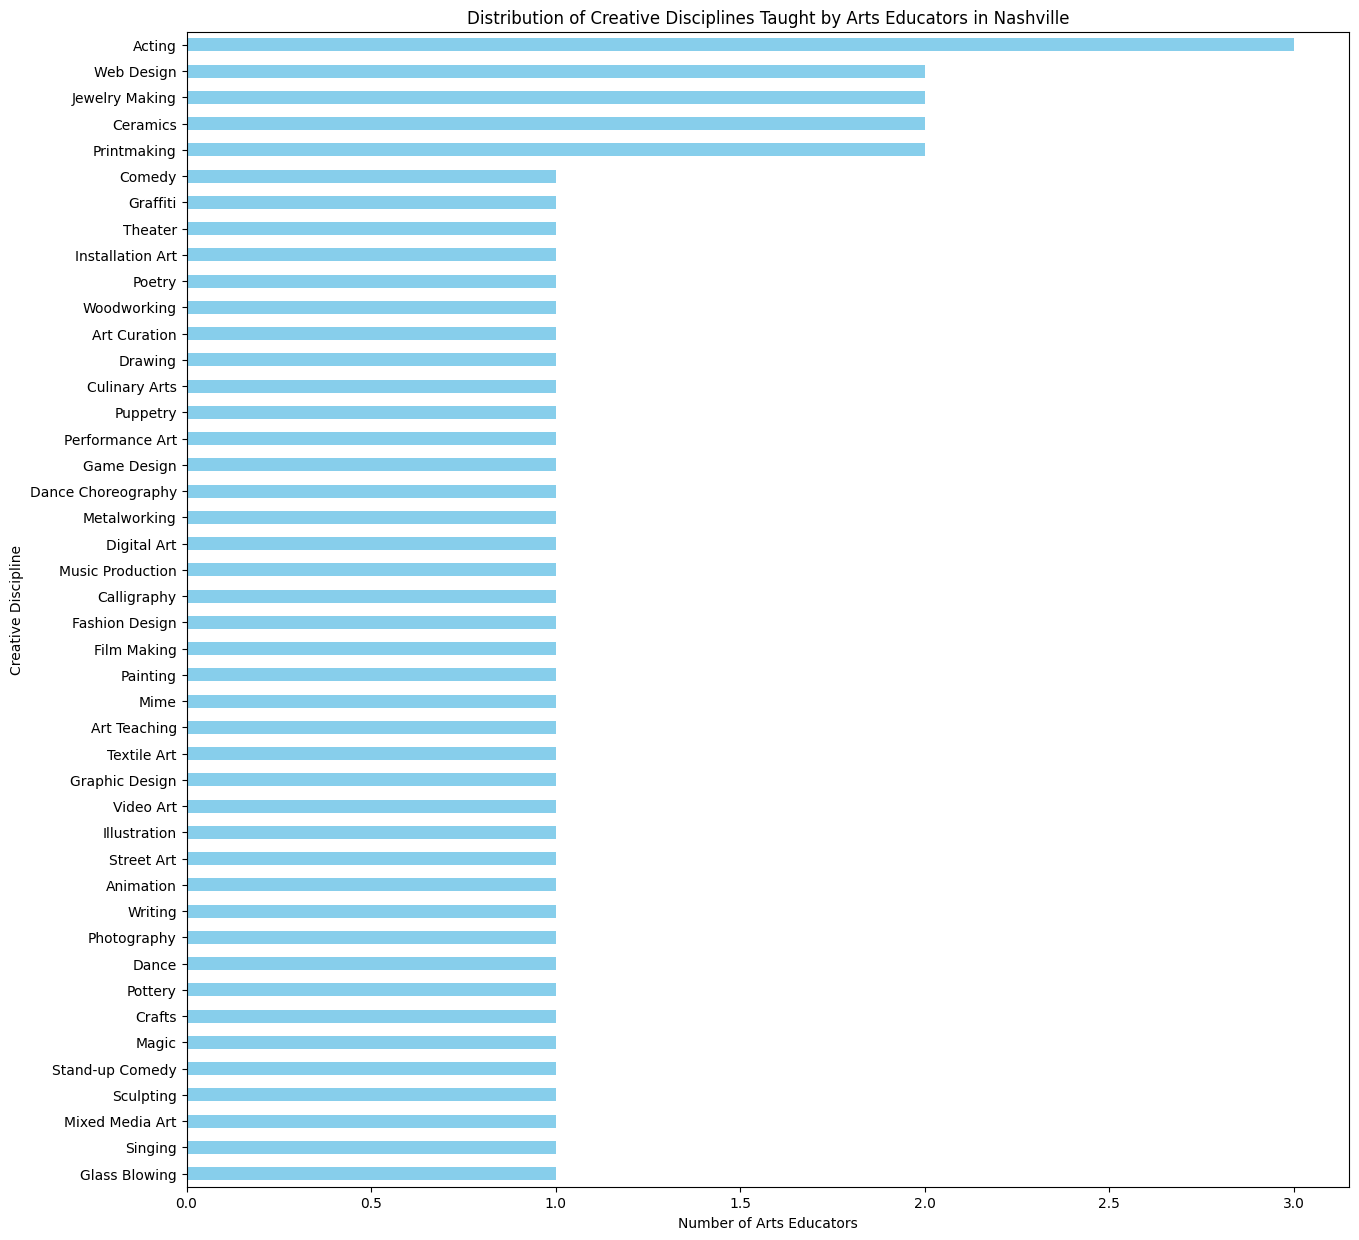

In [10]:
#Check distribution in 'Primary Creative Activity' column for Arts Educators data
primary_creative_values = df_arts_educators['Primary Creative Activity'].value_counts()

#Plot distribution of creative disciplines
plt.figure(figsize=(15, 15))
primary_creative_values.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Arts Educators')
plt.ylabel('Creative Discipline')
plt.title('Distribution of Creative Disciplines Taught by Arts Educators in Nashville')
#To display disciplines with highest counts at top
plt.gca().invert_yaxis()
plt.show()

We see for Arts Educators, Comedy, Art Teaching, Culinary Arts, Puppetry, Magic, and Metalworking are the most popular creative disciplines taught. However, there are several other disciplines, showcasing the diverse creativity being taught in Nashville.

### 5. Arts educators: What are the primary roles as arts educators and at what distribution?


This last question has essentially the same distribution as the previous question. The previous question asked for types of creative disciplines, and this asks for primary roles. Although there is a column in the data that is labeled "Describe Your Primary Role in Creative Sector," this is what we used to filter all Arts Educators. So, all Arts Educators have the primary role of Arts Educators. This does not give meaningful insight, so we look at the column "Primary Creative Activity" because arts educators are more likely to teach whatever their primary creative activity is. Since this is the same distribution as the last question, once again Comedy, Art Teaching, Culinary Arts, Puppetry, Magic, and Metalworking are the most popular primary roles, with a distribution of 2 arts educators.

Here is the distribution once more:

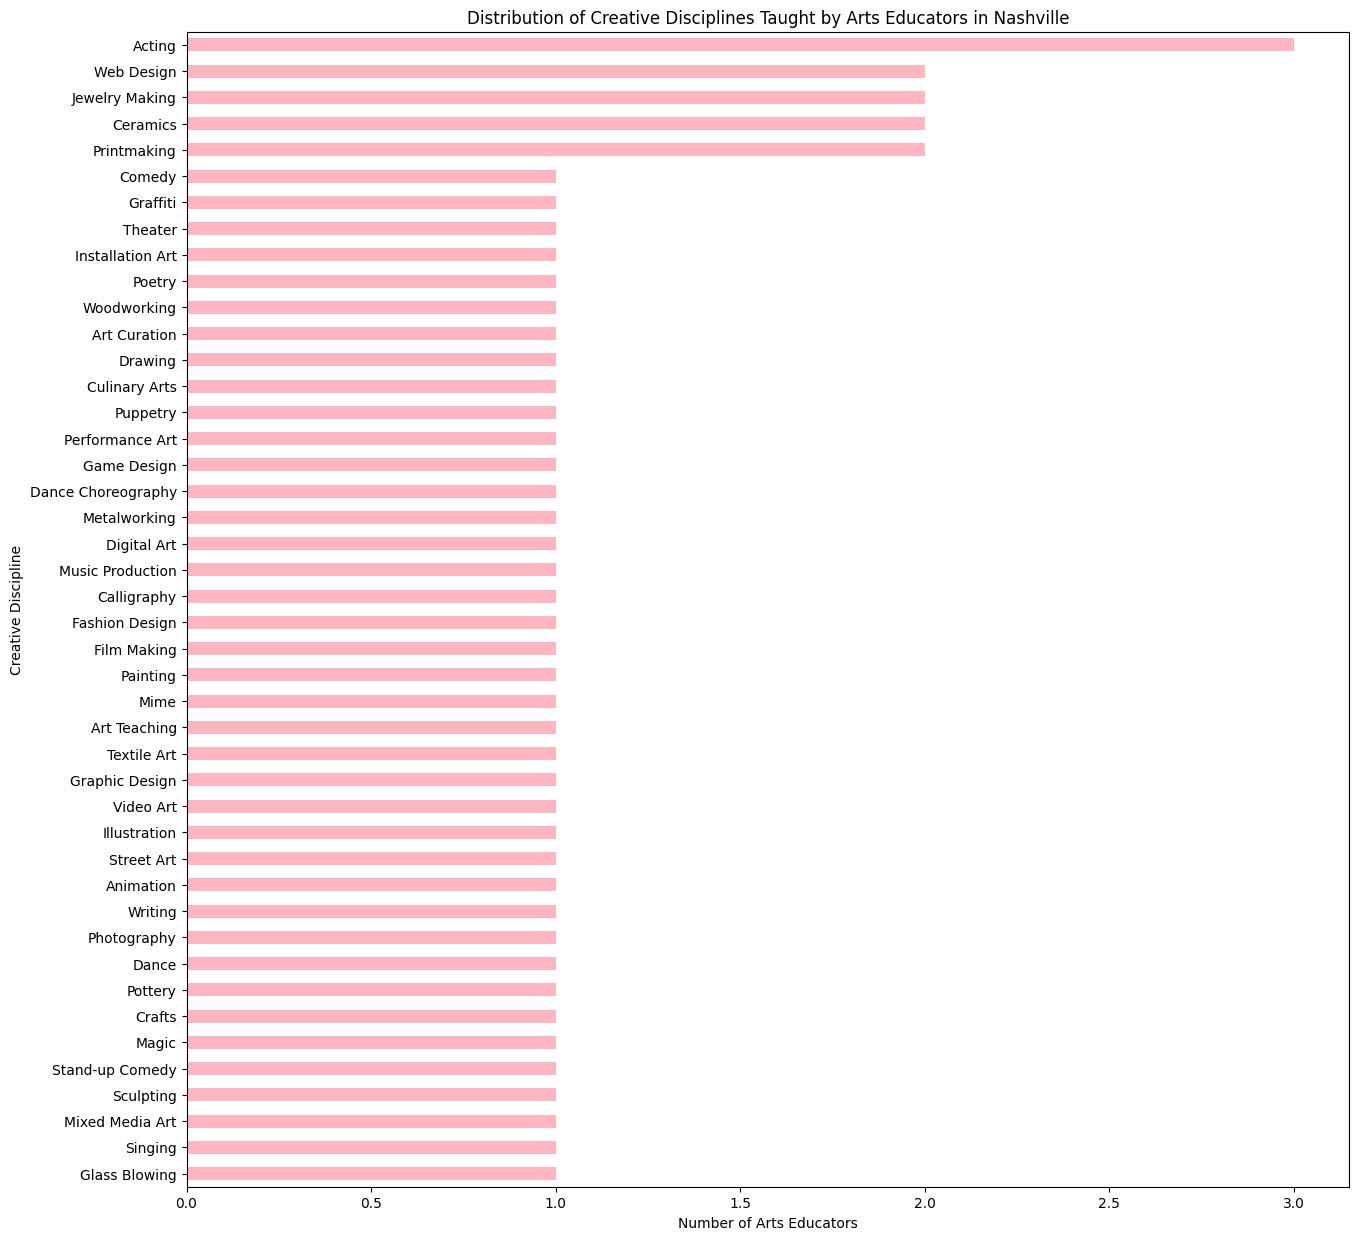

In [11]:
#Check distribution in 'Primary Creative Activity' column for Arts Educators data
primary_creative_values = df_arts_educators['Primary Creative Activity'].value_counts()

#Plot distribution of creative disciplines
plt.figure(figsize=(15, 15))
primary_creative_values.plot(kind='barh', color='lightpink')
plt.xlabel('Number of Arts Educators')
plt.ylabel('Creative Discipline')
plt.title('Distribution of Creative Disciplines Taught by Arts Educators in Nashville')
#To display disciplines with highest counts at top
plt.gca().invert_yaxis()
plt.show()

The column "Primary Creative Activity" encompasses both the subjects taught by the arts educators and their primary creative activities or roles.